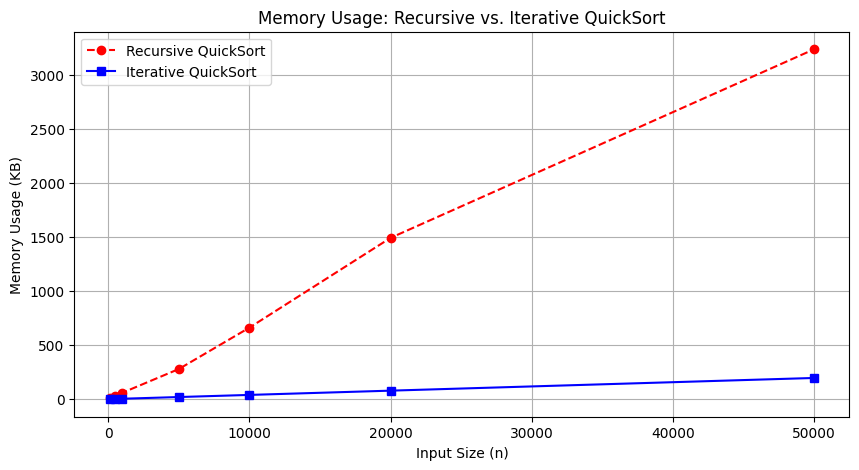

In [4]:
import tracemalloc
import time
import numpy as np
import matplotlib.pyplot as plt

def recursive_quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return recursive_quick_sort(left) + middle + recursive_quick_sort(right)

def iterative_quick_sort(arr):
    stack = [(0, len(arr) - 1)]
    while stack:
        left, right = stack.pop()
        if left >= right:
            continue
        pivot = arr[right]
        partition_idx = left
        for i in range(left, right):
            if arr[i] < pivot:
                arr[i], arr[partition_idx] = arr[partition_idx], arr[i]
                partition_idx += 1
        arr[partition_idx], arr[right] = arr[right], arr[partition_idx]
        stack.append((left, partition_idx - 1))
        stack.append((partition_idx + 1, right))

def measure_memory(func, arr):
    tracemalloc.start()
    start_time = time.time()
    func(arr.copy())  
    memory_used = tracemalloc.get_traced_memory()[1] 
    elapsed_time = time.time() - start_time
    tracemalloc.stop()
    return memory_used / 1024, elapsed_time  


input_sizes = [100, 500, 1000, 5000, 10000, 20000, 50000]
recursive_mem = []
iterative_mem = []
recursive_time = []
iterative_time = []

for size in input_sizes:
    test_arr = np.random.randint(0, 100000, size)

   
    mem, time_taken = measure_memory(recursive_quick_sort, test_arr)
    recursive_mem.append(mem)
    recursive_time.append(time_taken)

   
    mem, time_taken = measure_memory(iterative_quick_sort, test_arr)
    iterative_mem.append(mem)
    iterative_time.append(time_taken)


plt.figure(figsize=(10, 5))
plt.plot(input_sizes, recursive_mem, label="Recursive QuickSort", marker='o', linestyle="--", color='red')
plt.plot(input_sizes, iterative_mem, label="Iterative QuickSort", marker='s', linestyle="-", color='blue')
plt.xlabel("Input Size (n)")
plt.ylabel("Memory Usage (KB)")
plt.title("Memory Usage: Recursive vs. Iterative QuickSort")
plt.legend()
plt.grid()
plt.show()


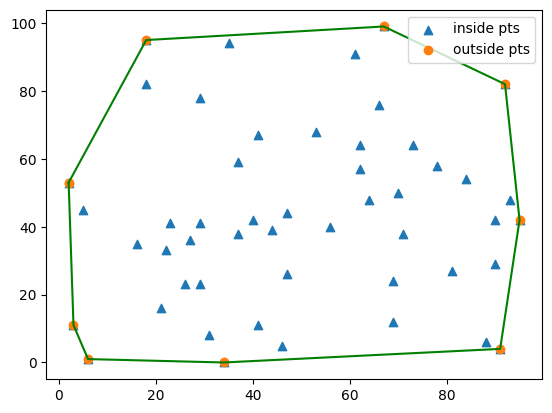

In [11]:
import matplotlib.pyplot as plt
x = [41, 34, 69, 78, 62, 5, 81, 61, 95, 27, 91, 2, 92, 21, 18, 47, 71, 69, 67, 35, 3, 22, 73, 41, 53, 47, 62, 37, 23, 29, 16, 90, 88, 40, 64, 46, 90, 70, 6, 93, 29, 84, 56, 66, 31, 44, 26, 37, 18, 29]
y = [67, 0, 24, 58, 64, 45, 27, 91, 42, 36, 4, 53, 82, 16, 95, 26, 38, 12, 99, 94, 11, 33, 64, 11, 68, 44, 57, 59, 41, 78, 35, 42, 6, 42, 48, 5, 29, 50, 1, 48, 23, 54, 40, 76, 8, 39, 23, 38, 82, 41]
x1 = [2, 3, 6,34, 91, 95, 92, 67, 18, 2]
y1 = [53, 11, 1, 0, 4, 42, 82, 99, 95, 53]
plt.scatter(x,y, marker='^', label = 'inside pts')
plt.scatter(x1, y1,label = 'outside pts')
plt.plot(x1, y1, color='green')
plt.legend()
plt.show()